## Import all Packages

In [1]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from keras import backend as K
if K.backend()=='tensorflow':
    # K.set_image_dim_ordering("th")
    K.set_image_data_format("channels_last")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# fix random seed for reproducibility
np.random.seed(1010)

# function for visualizing classes in a dataset
from utils import visualize_classes

Using TensorFlow backend.
/Users/zainraza/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/zainraza/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/zainraza/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/zainraza/anaconda3/lib/python3.7/site-pa

## Split the data into training and testing sections

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Visualization of Image Labels

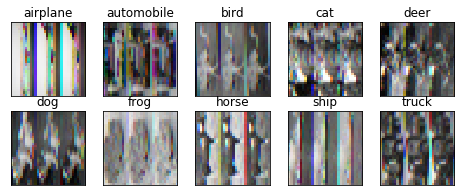

In [3]:
# Here are the classes in the CIFAR-10 dataset. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# number of cifar-10 data set classes
num_classes = 10

def visualize_classes(class_names):
    """This function visualizes the classes in an image classification
       dataset. It depends on the libraries Matplotlib and Numpy.

       Parameters:
       class_names(list): a list of strings for the different class names

       Returns: None

    """
    fig = plt.figure(figsize=(8, 3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(y_train[:] == i)[0]
        features_idx = x_train[idx, ::]
        # print(features_idx)
        img_num = np.random.randint(features_idx.shape[0])
        im = np.transpose(features_idx[img_num, ::], (1, 2, 0))
        ax.set_title(class_names[i])
        plt.imshow(im.reshape(32, 32, 3))
    plt.show()

visualize_classes(class_names)

## Image Data Preprocessing

In [4]:
# Image Data Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [5]:
# Did it work? 
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

### One-Hot Encoding the Output Label

In [6]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Implementing a Sequential CNN in Keras

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


## Model Summary

In [8]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

## Training the Model

In [9]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 133s 3ms/step - loss: 1.9337 - accuracy: 0.2887 - val_loss: 1.5624 - val_accuracy: 0.4309
Epoch 2/10
50000/50000 [==============================] - 137s 3ms/step - loss: 1.4676 - accuracy: 0.4653 - val_loss: 1.2440 - val_accuracy: 0.5530
Epoch 3/10
50000/50000 [==============================] - 132s 3ms/step - loss: 1.2631 - accuracy: 0.5468 - val_loss: 1.1263 - val_accuracy: 0.6018
Epoch 4/10
50000/50000 [==============================] - 138s 3ms/step - loss: 1.1320 - accuracy: 0.5997 - val_loss: 1.0556 - val_accuracy: 0.6266
Epoch 5/10
50000/50000 [==============================] - 141s 3ms/step - loss: 1.0313 - accuracy: 0.6349 - val_loss: 0.9063 - val_accuracy: 0.6866
Epoch 6/10
50000/50000 [==============================] - 146s 3ms/step - loss: 0.9522 - accuracy: 0.6613 - val_loss: 0.8519 - val_accuracy: 0.6986
Epoch 7/10
500